---
### Objetivo:

Uma analise comparativa de pandas X spark (de preferencia no databricks)

### O que fazer:

Pegar 2 datasets um > 50mb e outro menor

Realizar pre-processamento de dados e analise exploratoria dos dados, usando pandas e pyspark

Identificar quando o panda ou pyspark é melhor

### Datasets escolhidos:

https://www.kaggle.com/datasets/swatikhedekar/exploratory-data-analysis-on-netflix-data

Dataset público com informações sobre série e filmes disponiveis na plataforma de streaming Netflix de 2008 a 2021.

Tamanho do dataset = **3.4 mb**


https://www.kaggle.com/datasets/peacehegemony/history-of-music-bnb

Dataset com metadata sobre o catalogo de músicas na livraria britânica em http://explore.bl.uk

Tamanho do dataset = **261 mb**

---

In [23]:
# Importando as bibliotecas que serão utilizadas
import time # para registrar o tempo de execução
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

---
### Trabalhando com o Dataset maior usando PANDAS
---

In [24]:
inicio_pandas_musica = time.time()

In [25]:
# Leitura do arquivo csv

musicas = pd.read_csv('2detailedrecords.csv', engine='python', on_bad_lines='skip')
musicas.head(10)

,BL record ID,Composer,Composer life dates,Title,Standardised title,Other titles,Other names,Publication date (standardised),Publication date (not standardised),Country of publication,...,Contents,Referenced in,Subject/genre terms,Physical description,Series title,Number within series,ISBN,ISMN,Publisher number,BL shelfmark
0,1279866,NaN,NaN,The Penguin book of Canadian Folk songs,NaN,Canadian folk songs,"Fowke, Edith ; MacMillan, Keith (Keith Campbell)",1973.0,1973,England,...,A Fenian song -- Bold Wolfe -- The battle of t...,NaN,"Folk songs--Canada ; Folk songs, French--Canada","224 pages, music, 20 cm",NaN,NaN,0140708421,NaN,NaN,mH00/3305 ; X.439/3548
1,1312079,NaN,NaN,Anthology for The musician's guide to theory a...,NaN,"Musician's guide, anthology ; Musician's guide...","Clendinning, Jane Piper ; Marvin, Elizabeth West",2005.0,c2005,New York (State),...,NaN,NaN,Musical analysis--Music collections,"1 score (vii, 260 pages), 28 cm",NaN,NaN,0393925765,NaN,NaN,F.1946.h
2,1706700,"Hofhaimer, Paul",1459-1537,Harmoniae poeticae Pauli Hofheimeri : viri equ...,Harmoniae poeticae,"Harmoniae poeticae Pauli Hofheimeri, & Ludovic...","Horace ; Stomius, Johannes ; Senfl, Ludwig",1539.0,1539,Germany,...,NaN,RISM B/I 1539²⁶,"Part songs, Latin","5 parts, 8°",NaN,NaN,NaN,NaN,NaN,1070.c.12.(1.) ; 1213.i.1 ; G.727
3,1825532,NaN,NaN,Istituzioni e monumenti dell'arte musicale ita...,NaN,NaN,NaN,1931.0,1931-1939,Italy,...,v. 1-2. Andrea e Giovanni Gabrieli e la musica...,NaN,"Instrumental music ; Vocal music, Italian ; Sa...","6 volumes, illustrations, facsimiles (part col...",NaN,NaN,NaN,NaN,NaN,Hirsch IV.975 ; H.14
4,2225270,"Chapman, Mary, (Musician)",NaN,Eight ball studies suitable for use in girls' ...,NaN,NaN,NaN,1940.0,1940,England,...,NaN,NaN,Piano music ; Physical education and training,"1 score (12 pages ), 26 cm + 1 volume (8 pages...",NaN,NaN,NaN,NaN,NaN,D-07907.f.10
5,3050793,"Razzi, Serafino",1531-,"Santuario di laudi : o vero rime spirituali, p...",NaN,NaN,"Verdelot, Philippe",1609.0,1609,Italy,...,NaN,RISM B/I 1609⁸,"Hymns, Italian ; Propers (Music)","24, 240, 24 pages of music, 8°",NaN,NaN,NaN,NaN,NaN,11427.ee.25
6,3081869,Íslenzka stúdentafélag,NaN,Söngbók hins Íslenzka Stúdentafjelags,NaN,NaN,NaN,1894.0,1894,Iceland,...,Ættjarðarkvæði -- Alþýðuvísur -- Undir berum h...,NaN,Students' songs--Iceland ; Songs ; Music--Iceland,"103 pages, music, 15 x 18 cm, (oblong 8°)",NaN,NaN,NaN,NaN,NaN,866.k.15
7,3240772,"Sanchis Guarner, Manuel",NaN,Cancçoneret Valencià de Nadal : Segona edició ...,NaN,NaN,NaN,1973.0,1973,Spain,...,NaN,NaN,NaN,"55 pages, 24 cm",Els quaderns,no. 3 [Els quaderns],NaN,NaN,NaN,P.521/1605.(3.)
8,4083483,Liturgies.Latin Rite. Graduals. II. Local. Pas...,NaN,Graduale Pataviense (Wien 1511). Faksimile. He...,NaN,NaN,"Vaeterlein, Christian",1982.0,NaN,Germany,...,NaN,NaN,NaN,"vi, 294, 13 pages, music 25 x 33 cm",Das Erbe deutscher Musik. Bd.87. Abteilung Mit...,NaN,NaN,NaN,NaN,H.995.b./87
9,4162358,NaN,NaN,A B C D E F G H : The First Part of the Horn B...,NaN,First part of the horn book,NaN,1795.0,1795,England,...,NaN,NaN,NaN,folio,NaN,NaN,NaN,NaN,NaN,G.356.(6.)


In [26]:
#verificando o tamanho do dataset

musicas.shape

(1045507, 23)

In [27]:
# Alterando os nomes das colunas

colunas = {'BL record ID':'ID da gravação', 'Composer':'Compositor', 'Composer life dates':'Datas de vida do compositor', 'Title':'Titulo',
            'Standardised title':'Titulo padronizado', 'Other titles':'Outros titulos','Other names':'Outros nomes',
            'Publication date (standardised)':'Data de publicação (padronizada)', 'Publication date (not standardised)':'Data de publicação (não padronizada)',
             'Country of publication':'País de publicação', 'Place of publication':'Local de publicação', 'Publisher':'Editora','Notes':'Notas',
             'Contents':'Conteudos extras','Referenced in':'Referencias' ,'Subject/genre terms':'Genero','Physical description':'Descrição física',
             'Series title':'Titulo da série','Number within series':'Número dentro da série',
             'Publisher number':'Número da editora','BL shelfmark':'Marca de Prateleira'
            }

musicas.rename(columns=colunas, inplace=True)

In [28]:
musicas.head()

,ID da gravação,Compositor,Datas de vida do compositor,Titulo,Titulo padronizado,Outros titulos,Outros nomes,Data de publicação (padronizada),Data de publicação (não padronizada),País de publicação,...,Conteudos extras,Referencias,Genero,Descrição física,Titulo da série,Número dentro da série,ISBN,ISMN,Número da editora,Marca de Prateleira
0,1279866,NaN,NaN,The Penguin book of Canadian Folk songs,NaN,Canadian folk songs,"Fowke, Edith ; MacMillan, Keith (Keith Campbell)",1973.0,1973,England,...,A Fenian song -- Bold Wolfe -- The battle of t...,NaN,"Folk songs--Canada ; Folk songs, French--Canada","224 pages, music, 20 cm",NaN,NaN,0140708421,NaN,NaN,mH00/3305 ; X.439/3548
1,1312079,NaN,NaN,Anthology for The musician's guide to theory a...,NaN,"Musician's guide, anthology ; Musician's guide...","Clendinning, Jane Piper ; Marvin, Elizabeth West",2005.0,c2005,New York (State),...,NaN,NaN,Musical analysis--Music collections,"1 score (vii, 260 pages), 28 cm",NaN,NaN,0393925765,NaN,NaN,F.1946.h
2,1706700,"Hofhaimer, Paul",1459-1537,Harmoniae poeticae Pauli Hofheimeri : viri equ...,Harmoniae poeticae,"Harmoniae poeticae Pauli Hofheimeri, & Ludovic...","Horace ; Stomius, Johannes ; Senfl, Ludwig",1539.0,1539,Germany,...,NaN,RISM B/I 1539²⁶,"Part songs, Latin","5 parts, 8°",NaN,NaN,NaN,NaN,NaN,1070.c.12.(1.) ; 1213.i.1 ; G.727
3,1825532,NaN,NaN,Istituzioni e monumenti dell'arte musicale ita...,NaN,NaN,NaN,1931.0,1931-1939,Italy,...,v. 1-2. Andrea e Giovanni Gabrieli e la musica...,NaN,"Instrumental music ; Vocal music, Italian ; Sa...","6 volumes, illustrations, facsimiles (part col...",NaN,NaN,NaN,NaN,NaN,Hirsch IV.975 ; H.14
4,2225270,"Chapman, Mary, (Musician)",NaN,Eight ball studies suitable for use in girls' ...,NaN,NaN,NaN,1940.0,1940,England,...,NaN,NaN,Piano music ; Physical education and training,"1 score (12 pages ), 26 cm + 1 volume (8 pages...",NaN,NaN,NaN,NaN,NaN,D-07907.f.10


In [29]:
# Contagem percentual de valores nulos no dataframe

frequencia = musicas.isna().sum() 
percentual_na = round((musicas.isna().sum() / len(musicas))*100, 2)
valores_na = pd.DataFrame([frequencia, percentual_na]).transpose().rename(columns={0:'Frequência', 1:'% de NAs'})
valores_na

,Frequência,% de NAs
ID da gravação,0.0,0.00
Compositor,42059.0,4.02
Datas de vida do compositor,583222.0,55.78
Titulo,22.0,0.00
Titulo padronizado,807217.0,77.21
Outros titulos,1033223.0,98.83
Outros nomes,794108.0,75.95
Data de publicação (padronizada),21494.0,2.06
Data de publicação (não padronizada),15216.0,1.46
País de publicação,334204.0,31.97


In [30]:
musicas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045507 entries, 0 to 1045506
Data columns (total 23 columns):
 #   Column                                Non-Null Count    Dtype  
---  ------                                --------------    -----  
 0   ID da gravação                        1045507 non-null  int64  
 1   Compositor                            1003448 non-null  object 
 2   Datas de vida do compositor           462285 non-null   object 
 3   Titulo                                1045485 non-null  object 
 4   Titulo padronizado                    238290 non-null   object 
 5   Outros titulos                        12284 non-null    object 
 6   Outros nomes                          251399 non-null   object 
 7   Data de publicação (padronizada)      1024013 non-null  float64
 8   Data de publicação (não padronizada)  1030291 non-null  object 
 9   País de publicação                    711303 non-null   object 
 10  Local de publicação                   716348 non-null 

In [31]:
# Otimizando o tamanho da do dataframe

musicas['ID da gravação'] = musicas["ID da gravação"].astype('Int32')
musicas['Data de publicação (padronizada)'] = musicas["Data de publicação (padronizada)"].astype('Int16')

In [32]:
musicas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045507 entries, 0 to 1045506
Data columns (total 23 columns):
 #   Column                                Non-Null Count    Dtype 
---  ------                                --------------    ----- 
 0   ID da gravação                        1045507 non-null  Int32 
 1   Compositor                            1003448 non-null  object
 2   Datas de vida do compositor           462285 non-null   object
 3   Titulo                                1045485 non-null  object
 4   Titulo padronizado                    238290 non-null   object
 5   Outros titulos                        12284 non-null    object
 6   Outros nomes                          251399 non-null   object
 7   Data de publicação (padronizada)      1024013 non-null  Int16 
 8   Data de publicação (não padronizada)  1030291 non-null  object
 9   País de publicação                    711303 non-null   object
 10  Local de publicação                   716348 non-null   object
 11

In [33]:
# Agrupando os valores por país de publicação

pais_publicacao = musicas['País de publicação'].value_counts()
pais_publicacao

England             416538
United States       120741
Germany (East)       46903
France               43679
Germany              12403
                     ...  
Saint-Barthélemy         1
Montenegro               1
Saint Lucia              1
Barbados                 1
Uganda                   1
Name: País de publicação, Length: 167, dtype: int64

In [34]:
# Top 10 paises com mais publicações

top_10_paises = pais_publicacao.head(10)
top_10_paises

England           416538
United States     120741
Germany (East)     46903
France             43679
Germany            12403
Italy              12221
Austria            10855
Scotland            5712
Wales               5308
Canada              3935
Name: País de publicação, dtype: int64

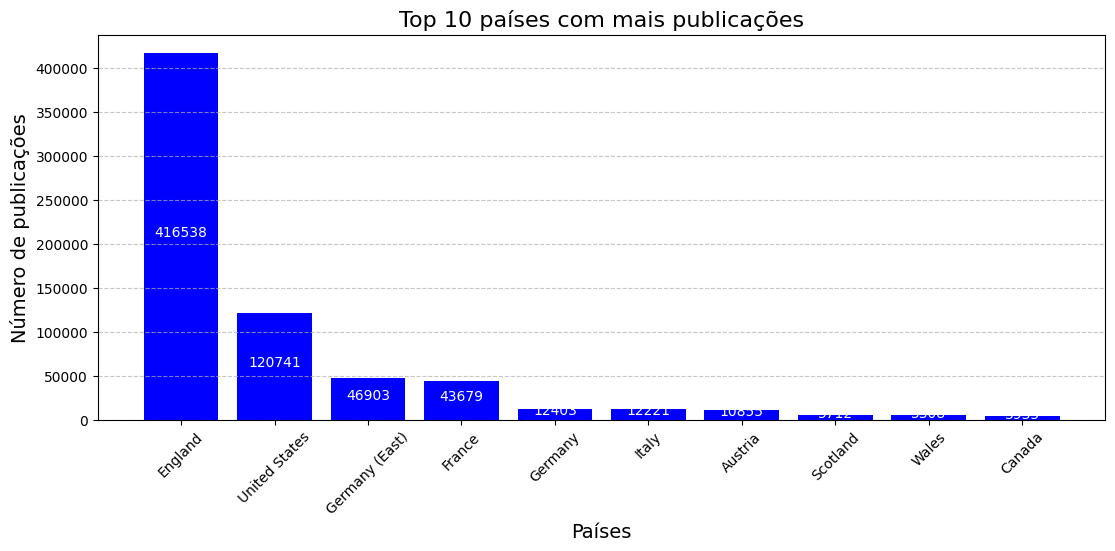

In [35]:
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center', color = 'white',fontsize=10)

plt.figure(figsize=(13,5))
plt.bar(x=top_10_paises.index, height=top_10_paises, color='blue')
plt.xlabel('Países', fontsize=14)
plt.ylabel('Número de publicações', fontsize=14)
plt.title('Top 10 países com mais publicações', fontsize=16)
addlabels(x=top_10_paises.index, y=top_10_paises)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

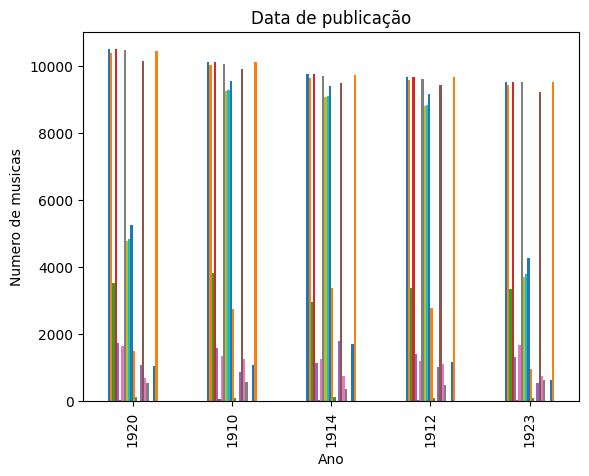

In [36]:
# separando o dataset por Data de publicação

data_publicação = musicas.groupby("Data de publicação (padronizada)").count()
top_5 = data_publicação.nlargest(5, "ID da gravação")

# Imprime os grupos resultantes

top_5.plot(kind='bar',legend=False)

# Adiciona título ao gráfico e rótulos aos eixos
plt.title("Data de publicação")
plt.xlabel("Ano")
plt.ylabel("Numero de musicas")

# Exibe o gráfico
plt.show()


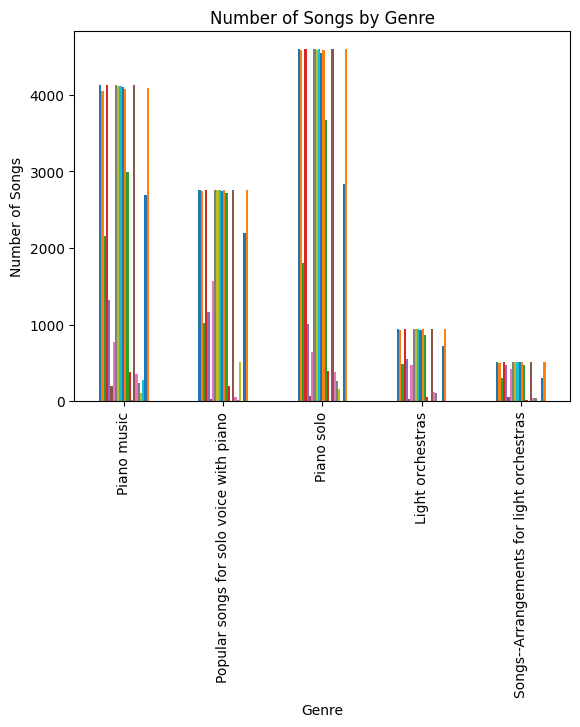

In [37]:
# Conta o número de músicas em cada gênero
count_by_genre = musicas.groupby("Genero").count()

# Seleciona a coluna de título padronizado para contar o número de músicas por gênero
count_by_genre = count_by_genre.nlargest(5, "Titulo padronizado")

# Plota o número de músicas por gênero em um gráfico de barra
count_by_genre.plot(kind='bar',legend=False)

# Adiciona título ao gráfico e rótulos aos eixos
plt.title("Number of Songs by Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Songs")

# Exibe o gráfico
plt.show()

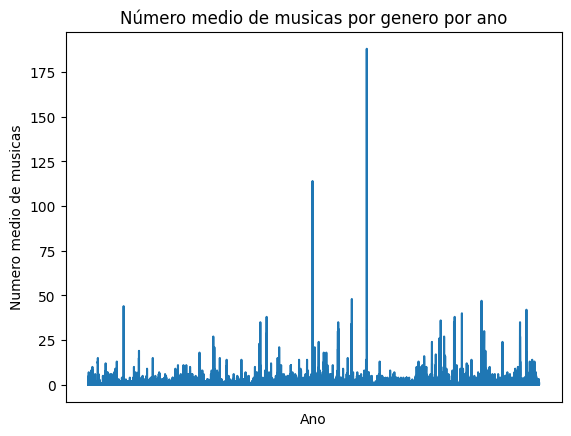

In [38]:
# Agrupe as músicas por gênero e ano de publicação
grouped = musicas.groupby(['Genero', 'Data de publicação (padronizada)'])

# Calcule a média de músicas por gênero e ano de publicação
mean_by_genre_and_year = grouped['Titulo padronizado'].count().groupby(['Genero', 'Data de publicação (padronizada)']).mean()

# Plota a média de músicas por gênero e ano de publicação em um gráfico de linha
mean_by_genre_and_year.plot(kind='line', x='Data de publicação (padronizada)', y='Titulo padronizado')

# Adiciona título ao gráfico e rótulos aos eixos
plt.title("Número medio de musicas por genero por ano")
plt.xlabel("Ano")
plt.ylabel("Numero medio de musicas")
plt.xticks([])

# Exibe o gráfico
plt.show()

In [39]:
#Usando uma operação de filtragem no dataset

Filtrado = musicas[(musicas['Genero'].notnull()) & (musicas['Data de publicação (padronizada)'] > 1980) & (musicas['Genero'].str.contains("rock"))]
Filtrado

,ID da gravação,Compositor,Datas de vida do compositor,Titulo,Titulo padronizado,Outros titulos,Outros nomes,Data de publicação (padronizada),Data de publicação (não padronizada),País de publicação,...,Conteudos extras,Referencias,Genero,Descrição física,Titulo da série,Número dentro da série,ISBN,ISMN,Número da editora,Marca de Prateleira
621942,5024732,"Dylan, Bob",1941-,The concise Bob Dylan : the music and complete...,Songs. Selections. arranged,NaN,"Evans, Peter",1997,c1997,England,...,NaN,NaN,Folk-rock music ; Popular music--Fake books,"157 pages, 25 cm",NaN,NaN,0711957800,NaN,AM937200,E.1080.a.(1.)
623660,5026558,"Anderson, Ian",1947-,The best of - Jethro Tull : [10 songs arranged...,Songs. Selections,NaN,"Evans, Peter",2000,c2000,England,...,NaN,NaN,Popular music--1961-1970 ; Popular music--1971...,"1 score (48 pages), 31 cm",NaN,NaN,0711983925,NaN,AM966350,G.1314.z.(3.)
624082,5026997,Corrs (Musical group),NaN,Play guitar with-- The Corrs : on six of their...,Songs. Selections,NaN,"Dick, Arthur",1999,c1999,England,...,"Erin Shore (Intro) -- Forgiven, not forgotten ...",NaN,Popular music--1991-2000 ; Folk-rock music,"1 score (45 pages), 31 cm + 1 sound disc (digi...",NaN,NaN,0711978654,NaN,AM960971,G.1415.ss.(3.)
624394,5027326,Corrs (Musical group),NaN,"Forgiven, not forgotten : [the album arranged ...",NaN,NaN,"Jones, Derek",1999,c1999,England,...,Contents: Erin shore (Traditional intro) -- Fo...,NaN,Folk-rock music ; Folk music--Ireland ; Violin...,"1 score (72 pages), 31 cm",NaN,NaN,0711974063,NaN,AM959123,VH05/8131 ; G.1428.vv.(1.)
624524,5027464,Corrs (Musical group),NaN,The Corrs for violin,Songs. Selections. arranged,NaN,"Crehan, Dermot",1999,c1999,England,...,NaN,NaN,"Folk-rock music ; Violin music, Arranged","31 pages, 31 cm",NaN,NaN,0711978719,NaN,AM961037,G.1428.ee.(3.)
629019,5032059,"Simon, Paul",1941-,Simon and Garfunkel hits,Songs. Selections. arranged,NaN,"Dadi, Marcel",1997,1997,France,...,Contents: April come she will ̂Bookends ̂The b...,NaN,Folk-rock music ; Guitar music (Folk-rock),"1 score (80 pages), 31 cm",NaN,NaN,NaN,NaN,EMF 100639,G.1428.bb.(5.)
631806,5034913,"Saliers, Emily",1963-,Selections from Indigo Girls : 1200 curfews,Songs. Selections,NaN,"Ray, Amy ; Whitehill, David ; Anderson, Fred ;...",1998,1998,United States,...,Closer to fine -- Galileo -- Ghost -- I don't ...,NaN,Folk-rock music ; Guitar music (Folk-rock),"1 score (126 pages), illustrations, 31 cm",Guitar recorded versions,NaN,079356638X,NaN,HL00690136,VH05/8218 ; G.1428.ff.(2.)
633851,5037086,"Haskell, Gordon",1946-,"Harry's bar : piano, vocal, guitar",NaN,NaN,"Harvey, Chris",2002,2002,England,...,Contents: How wonderful you are -- All the tim...,NaN,Popular music--2001-2010 ; Folk-rock music,"1 score (64 pages), 31 cm",NaN,NaN,1843281791,570211791,9672A,G.1431.s.(1.)
635651,5038934,Corrs (Musical group),NaN,The best so far,Songs. Selections,NaN,NaN,2000,c2000,England,...,NaN,NaN,Folk-rock music,"1 score (80 pages), 31 cm",NaN,NaN,0711987564,NaN,AM969463,G.1431.p.(2.)
843541,5247697,"Gold, Ken",NaN,Who's gonna rock you,Who's gonna rock you. arranged,NaN,"Ocean, Billy ; Nolans",1982,"1982, c1980",England,...,NaN,NaN,Disco rock songs for solo voice with piano,"1 score (4 pages), 31 cm",NaN,NaN,NaN,NaN,NaN,G.296.s.(8.)


In [40]:
fim_pandas_musica = time.time()

---
### Comparando os resultados
---

In [41]:


# Tempo de execução para o dataframe menor usando:
print('Tempo de execução para o dataframe maior usando:')

#Pandas
t3 = fim_pandas_musica - inicio_pandas_musica
print(f'Usando Pandas: {t3}')




Tempo de execução para o dataframe maior usando:
Usando Pandas: 28.203393936157227
